# K-Nearest Neighbors Classification

#### Import libraries

In [12]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#### Import iris dataset

In [13]:
iris = pd.read_csv("data/iris.csv")

In [14]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Map each iris species to a number
We'll use 'setosa':0, 'versicolor':1, 'virginica':2 and create a column caled `species_num`

In [15]:
species_num = {'setosa':0, 'versicolor':1, 'virginica':2}
iris['species_num'] = iris.species.map(species_num)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


*If you think that this is tedious, you are right! We'll talk about better ways to do this when we do our Preprocessing lesson.*

#### Plot a scatterplot

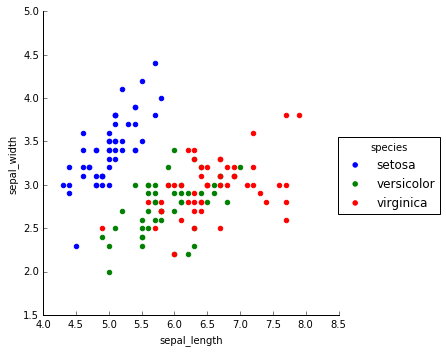

In [16]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()
plt.show()

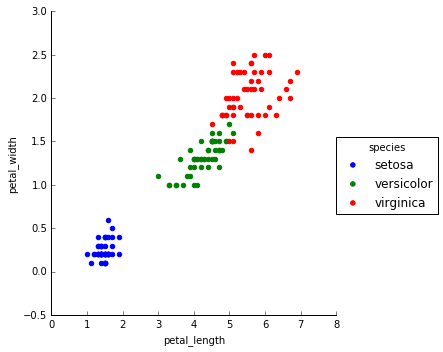

In [17]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend()
plt.show()

## KNN Modeling

### KNN algorithm
1. Pick a value for K
2. Search for K observations in the training data nearest the unknown iris
3. Use the most popular response from the K nearest neighbors as the predicted response for the unknown K

#### Store the features as "X"

In [18]:
features = ['sepal_width','sepal_length','petal_width','petal_length']
X = iris[features]
X.head()

,sepal_width,sepal_length,petal_width,petal_length
0,3.5,5.1,0.2,1.4
1,3.0,4.9,0.2,1.4
2,3.2,4.7,0.2,1.3
3,3.1,4.6,0.2,1.5
4,3.6,5.0,0.2,1.4


#### Store the response as "y"

In [19]:
y = iris.species_num
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64

#### Train, Test, Split the Dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Instantiate a model

In [21]:
knn = KNeighborsClassifier(n_neighbors = 1)

#### Fit a model

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Check the testing accuracy

In [23]:
y_pred = knn.predict(X_test)

In [25]:
print(metrics.accuracy_score(y_test, y_pred))

0.8947368421052632


### Create a KNN model with 5 neighbors. Does it improve?

In [28]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
y_pred = knn.predict(X_test)

In [31]:
print(metrics.accuracy_score(y_test, y_pred))

0.9473684210526315


#### K = 5 seems better. Can we find a better way?

In [36]:
# we'll search K=1 through K=25 
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))    

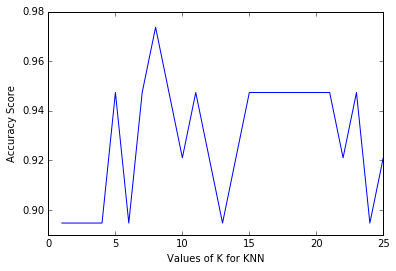

In [37]:
plt.plot(k_range, scores)
plt.xlabel("Values of K for KNN")
plt.ylabel("Accuracy Score")

* Training accuracy increases as model complexity increases
* Testing accuracy penalizes models that are too complex or not complex enough
* For KNN models, complexity is determined by the value of K (lower value = more complex)

*We'll revisit searching hyperparameter space later, and we will learn other ways to do this*

# Independent Practice

Build a KNN model using the `wine.csv` dataset. This data is the result of a chemical analysis of wines grown in the same region in Italy using three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The dataset comprises 13 features ('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline') and a target (type of cultivars).

This data has three types of cultivar classes: 'class_0', 'class_1', and 'class_2'. Here, you can build a model to classify the type of cultivar. 

In [49]:
#import the dataset
wine = pd.read_csv("data/wine.csv")

In [45]:
wine.head()

,cultivar,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [47]:
wine.shape

(178, 14)

In [50]:
# Store the features as "X"
features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
X = wine[features]

In [52]:
# Store the response as "y"
y = wine['cultivar']

In [53]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [54]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [57]:
knn.score(X_test, y_test)

0.66666666666666663

In [58]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [59]:
knn.score(X_test, y_test)

0.61111111111111116